In [3]:
#!pip install spacy


In [23]:
#!python -m spacy download en_core_web_sm

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')

#Visualizing the dependency parse
from spacy import displacy  

#stemmimg
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

## Import the vocab Matcher library
from spacy.matcher import Matcher

#Import the PhraseMatcher library

from spacy.matcher import PhraseMatcher

In [5]:
nlp = spacy.load('en_core_web_sm')

In [5]:
doc = nlp('Tesla is looking at buying U.S. startup for $6 million')

In [21]:
# Print each token separately
for token in doc:
    print(token.text,token.pos,token.dep)

Tesla 96 429
is 87 405
looking 100 8206900633647566924
at 85 443
buying 100 438
U.S. 96 7037928807040764755
startup 92 416
for 85 443
$ 99 446
6 93 7037928807040764755
million 93 439


In [22]:
for token in doc:
    #print(token.text,token.pos)\
    print(token.text,token.pos_,token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [57]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x8b29908>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x2666f0a8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x2666f648>)]

In [24]:
nlp.pipe_names

['tagger', 'parser', 'ner']

# Tokenization

In [25]:
# doc2 has the . at the end theic maped with   ". PUNCT punct" and there is the space between the words which pos has the SPACE
doc2 = nlp(u"Tesla isn't    looking into startups anymore.") 

for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
   SPACE 
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [28]:
doc2

Tesla isn't   looking into startups anymore.

In [29]:
doc2[0]

Tesla

In [30]:
type(doc2)

spacy.tokens.doc.Doc

# Part-of-Speech Tagging (POS)

In [31]:
doc2[0].pos_

'PROPN'

In [32]:
spacy.explain('PROPN')

'proper noun'

In [34]:
doc2[0].dep_

'nsubj'

In [33]:
spacy.explain('nsubj')

'nominal subject'

# Additional Token Attributes

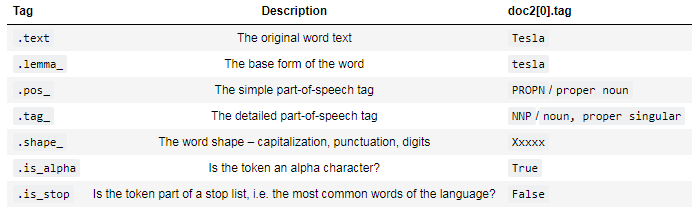

In [35]:
# Lemmas (the base form of the word):
print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


In [39]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_)

VERB
VBG


In [40]:
spacy.explain(doc2[4].tag_)

'verb, gerund or present participle'

In [45]:
#print(doc2[4].tag_ + \ + spacy.explain(doc2[4].tag_))

print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VBG / verb, gerund or present participle


In [41]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [46]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


# Spans

In [48]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [49]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [51]:
type(life_quote)

spacy.tokens.span.Span

In [50]:
type(doc3)

spacy.tokens.doc.Doc

# Sentences

In [52]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [53]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [55]:
doc4[6]

This

In [54]:
doc4[6].is_sent_start

True

In [58]:
doc4[8].is_sent_start  #None output

# Tokenization and methods

In [4]:
# Create a string that includes opening and closing quotation marks
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [14]:
# Create a Doc object and explore tokens
doc = nlp(mystring)

for token in doc:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

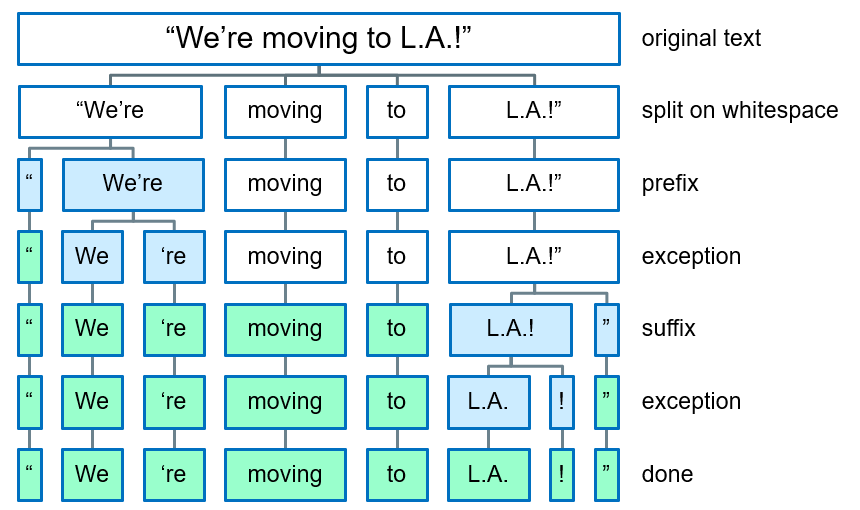

In [6]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


<font color=green>Note that the exclamation points, comma, and the hyphen in 'snail-mail' are assigned their own tokens, yet both the email address and website are preserved.</font>

In [7]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


<font color=blue>Here the distance unit and dollar sign are assigned their own tokens, yet the dollar amount is preserved.</font>

# Exceptions
Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [9]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


# counting Token

In [10]:
len(doc4)

11

## counting vocab entries

In [12]:
len(doc4.vocab) # vocab contain for doc4


512

## Tokens can be retrieved by index position and slice

In [16]:
doc5 = nlp(u'It is better to give than to receive.')

# Retrieve the third token:
doc5[2]

better

In [17]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [18]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

# Tokens cannot be reassigned

In [19]:
doc[0]= 'test'

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

# Named Entities

**Named entities are accessible through the "ents"**

In [20]:

doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')



Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 

In [21]:
for entity in doc8.ents:
    print(entity)

Apple
Hong Kong
$6 million


In [24]:
for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [29]:
for entity in doc8.ents:
    print(entity)
    print(entity.label_)
    print(spacy.explain(entity.label_))
    print('\n')

Apple
ORG
Companies, agencies, institutions, etc.


Hong Kong
GPE
Countries, cities, states


$6 million
MONEY
Monetary values, including unit




## Noun Chunks
Similar to Doc.ents, Doc.noun_chunks are another object property. Noun chunks are "base noun phrases"

In [30]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [31]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [32]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater


# Visualizing the dependency parse

In [35]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc,style='dep', jupyter=True, options={'distance': 80})

In [36]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

# Creating Visualizations Outside of Jupyter

In [ ]:
#doc = nlp(u'This is a sentence.')
#displacy.serve(doc, style='dep')

# Stemming
spacy has a lemmatization, but no stemming. I think lemmatization is generally better, and Porter's algorithm is usually only useful to replicate another system exactly. We deprioritise replication in spaCy, to avoid duplicating functionalit

In [1]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import PorterStemmer

In [2]:
p_stemmer = PorterStemmer()

In [6]:
words = ['run','runner','runninAg','ran','runs','easily','fairly']

In [7]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
runninAg --> runninag
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


# Snowball Stemm

In [8]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [9]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [10]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


In [11]:
words = ['generous','generation','generously','generate']

In [12]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

generous --> generous
generation --> generat
generously --> generous
generate --> generat


<font color=green>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>
___

In [13]:
words = ['consolingly']

In [14]:
print('Porter Stemmer:')
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

Porter Stemmer:
consolingly --> consolingli


In [15]:
print('Porter2 Stemmer:')
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

Porter2 Stemmer:
consolingly --> consol


sentance_stemmimg

In [16]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> I
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


# Lemmatization

In [17]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


# Function to display lemmas

In [31]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [32]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON   561228191312463089     -PRON-
saw          VERB   11925638236994514241   see
eighteen     NUM    9609336664675087640    eighteen
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


In [20]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I            PRON   561228191312463089     -PRON-
am           AUX    10382539506755952630   be
meeting      VERB   6880656908171229526    meet
him          PRON   561228191312463089     -PRON-
tomorrow     NOUN   3573583789758258062    tomorrow
at           ADP    11667289587015813222   at
the          DET    7425985699627899538    the
meeting      NOUN   14798207169164081740   meeting
.            PUNCT  12646065887601541794   .


In [46]:
words = ['generous','generation','generously','generate']
words = nlp(' '.join(words))


In [47]:
show_lemmas(words)
#words

generous     ADJ    12333698124728187681   generous
generation   NOUN   12757012465390741750   generation
generously   ADV    1539093411080084076    generously
generate     VERB   17214151181767158707   generate


# Stop Words

this are common words in english  not gives too much information 

In [52]:
# Print the set of spaCy's default stop words (remember that sets are unordered): allmost 326 words
print(nlp.Defaults.stop_words)

{'side', 'my', 'show', 'therein', 'latter', 'when', 'however', 'rather', 'became', 'since', '‘ll', 'each', 'elsewhere', 'ours', 'as', 'from', 'make', 'though', 'cannot', 'done', 'fifteen', 'itself', 'us', 'wherein', 'anywhere', 'seeming', 'to', 'hereupon', 'does', 'are', 'more', '‘d', 'yourselves', 'those', 'has', 'over', 'something', 'them', 'for', 'or', 'whereafter', 'serious', 'this', 'but', 'where', 'several', 'whatever', '’ve', 'without', "'d", 'few', 'anything', 'again', 'get', 'very', 'well', 'of', 'why', 'most', 'their', 'five', 'might', 'beyond', 'next', 'any', 'nine', 'by', 'name', 'never', 'yet', 'nowhere', 'all', 'himself', 'down', 'no', 'four', 'twelve', 'made', 'always', 'every', 'becoming', "n't", 'it', "'re", 'take', 'hence', '‘ve', 'forty', 'namely', 'thereafter', 'than', 'hereby', 'either', 'noone', 'into', 'was', 'therefore', 'under', 'after', 'amount', 'myself', 'own', 'with', 'had', 'same', 'not', 'whether', 'become', 'there', 'hundred', 'used', 'ten', 'everywhere'

In [53]:
len(nlp.Defaults.stop_words)

326

# To see if a word is a stop word

In [54]:
nlp.vocab['myself'].is_stop

True

In [55]:
nlp.vocab['mystery'].is_stop

False

# To add a stop word

In [80]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')



In [81]:
# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop  = True

# To remove a stop word

In [82]:
nlp.vocab['btw'].is_stop

True

In [83]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('btw')

# Remove the stop_word tag from the lexeme
nlp.vocab['btw'].is_stop = False

In [84]:
len(nlp.Defaults.stop_words)

325

In [85]:
nlp.vocab['btw'].is_stop

False

# Vocabulary and Matching

# Rule-based Matching
spaCy offers a rule-matching tool called Matcher that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [86]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

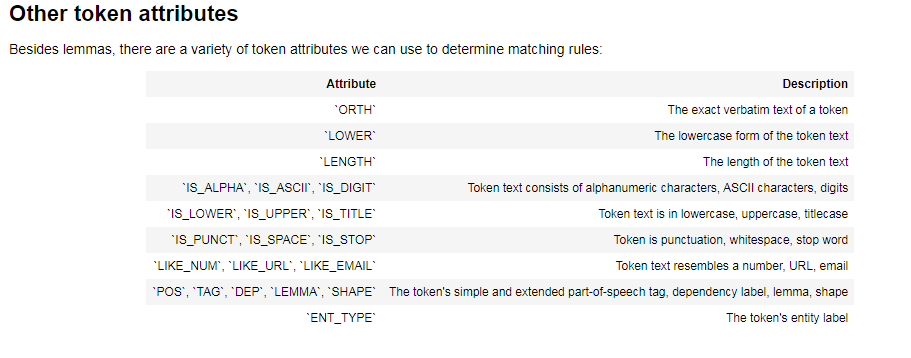

# Creating patterns
In literature, the **phrase 'solar power'** might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'SolarPower' that finds all three:

In [87]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

matcher.add('SolarPower', None, pattern1, pattern2, pattern3) #create matcher

Let's break this down:

* pattern1 looks for a single token whose lowercase text reads 'solarpower'
* pattern2 looks for two adjacent tokens that read 'solar' and 'power' in that order
* pattern3 looks for three adjacent tokens, with a middle token that can be any punctuation.*
* Remember that single spaces are not tokenized, so they don't count as punctuation.

# Applying the matcher to a Doc object

In [89]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [90]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


In [91]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


# Setting pattern options and quantifiers
You can make token rules optional by passing an 'OP':'*' argument. This lets us streamline our patterns list:

In [92]:
# Redefine the patterns:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2)

In [93]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


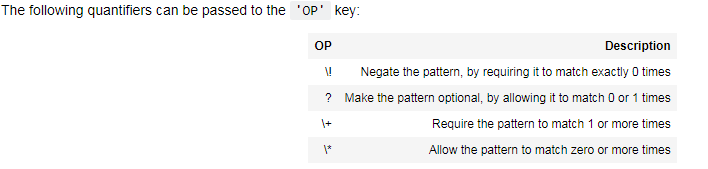

# Be careful with lemmas!

In [94]:
# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

In [96]:
doc2 = nlp(u'Solar-powered energy runs solar-powered cars.')

In [95]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LEMMA': 'power'}] # CHANGE THIS PATTERN

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2)

In [97]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


In [98]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solarpowered'}]
pattern4 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2, pattern3, pattern4)

In [99]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


# PhraseMatcher

n this case we use PhraseMatcher to create a Doc object from a list of phrases, and pass that into matcher instead.

In [101]:
# Import the PhraseMatcher library

from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

In [107]:
with open('reaganomics.txt') as f:
    doc3 = nlp(f.read())

doc3

REAGANOMICS
https://en.wikipedia.org/wiki/Reaganomics

Reaganomics (a portmanteau of [Ronald] Reagan and economics attributed to Paul Harvey)[1] refers to the economic policies promoted by U.S. President Ronald Reagan during the 1980s. These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.

The four pillars of Reagan's economic policy were to reduce the growth of government spending, reduce the federal income tax and capital gains tax, reduce government regulation, and tighten the money supply in order to reduce inflation.[2]

The results of Reaganomics are still debated. Supporters point to the end of stagflation, stronger GDP growth, and an entrepreneur revolution in the decades that followed.[3][4] Critics point to the widening income gap, an atmosphere of greed, and the national debt tripling in eight years which ultimately reversed the pos

In [105]:
# First, create a list of match phrases:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

# Next, convert each phrase to a Doc object:
phrase_patterns = [nlp(text) for text in phrase_list]

# Pass each Doc object into matcher (note the use of the asterisk!):
matcher.add('VoodooEconomics', None, *phrase_patterns)

# Build a list of matches:
matches = matcher(doc3)

In [106]:
# (match_id, start, end)
matches

[(3473369816841043438, 41, 45),
 (3473369816841043438, 49, 53),
 (3473369816841043438, 54, 56),
 (3473369816841043438, 61, 65),
 (3473369816841043438, 673, 677),
 (3473369816841043438, 2987, 2991)]

# Viewing Matches
There are a few ways to fetch the text surrounding a match

In [108]:
doc3[665:685]  # Note that the fifth match starts at doc3[673]

same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian

**Another way is to first apply the sentencizer to the Doc, then iterate through the sentences to the match point:**

In [110]:
# Build a list of sentences
sents = [sent for sent in doc3.sents]

# In the next section we'll see that sentences contain start and end token values:
#print(sents[0].start, sents[0].end)

0 2


In [115]:
sents

[REAGANOMICS, https://en.wikipedia.org/wiki/Reaganomics
 , Reaganomics (a portmanteau of [Ronald] Reagan and economics attributed to Paul Harvey)[1] refers to the economic policies promoted by U.S. President Ronald Reagan during the 1980s., These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.
 , The four pillars of Reagan's economic policy were to reduce the growth of government spending, reduce the federal income tax and capital gains tax, reduce government regulation, and tighten the money supply in order to reduce inflation.[2]
 , The results of Reaganomics are still debated., Supporters point to the end of stagflation, stronger GDP growth, and an entrepreneur revolution in the decades that followed.[3][4], Critics point to the widening income gap, an atmosphere of greed, and the national debt tripling in eight years which ultimately rever

In [111]:
# Iterate over the sentence list until the sentence end value exceeds a match start value:
for sent in sents:
    if matches[4][1] < sent.end:  # this is the fifth match, that starts at doc3[673]
        print(sent)
        break

At the same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian demand-stimulus economics.


In [118]:
matches[4][1]

673